In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [2]:
celeba_bldr = tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
celeba = celeba_bldr.as_dataset(shuffle_files=False)
print(celeba.keys())

celeba_train = celeba['train']
celeba_valid = celeba['validation']
celeba_test = celeba['test']

def count_items(ds):
    n = 0
    for _ in ds:
        n += 1
    return n

print('Train set:  {}'.format(count_items(celeba_train)))
print('Validation: {}'.format(count_items(celeba_valid)))
print('Test set:   {}'.format(count_items(celeba_test)))

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Shuffling and writing examples to /root/tensorflow_datasets/celeb_a/2.0.0.incompleteGTZUHH/celeb_a-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/celeb_a/2.0.0.incompleteGTZUHH/celeb_a-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/celeb_a/2.0.0.incompleteGTZUHH/celeb_a-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet
ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet
ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet
ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset celeb_a downloaded and prepared to /root/tensorflow_datasets/celeb_a/2.0.0. Subsequent calls will reuse this data.
dict_keys(['test', 'train', 'validation'])
Train set:  162770
Validation: 19867
Test set:   19962


In [8]:
celeba_train = celeba_train.take(16000)
celeba_valid = celeba_valid.take(1000)

print('Train set: {}'.format(count_items(celeba_train)))
print('Validation: {}'.format(count_items(celeba_valid)))

Train set: 16000
Validation: 1000


#Image Augmentation and Transformation

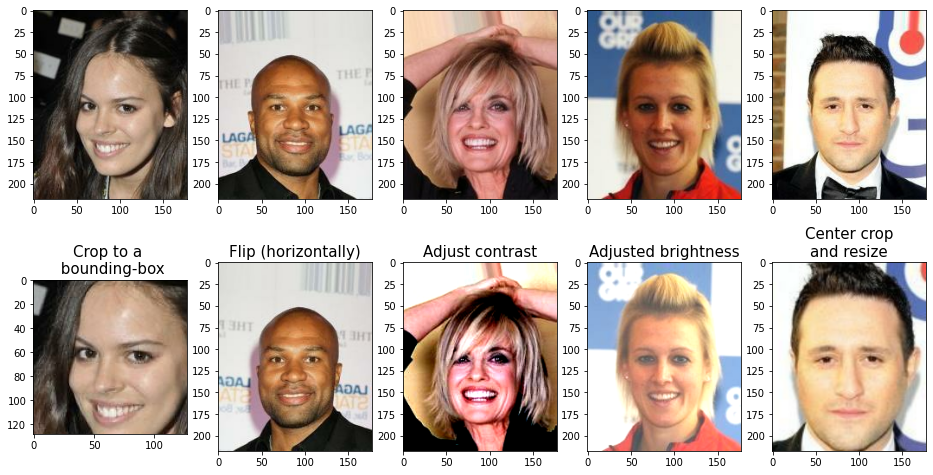

In [24]:

# take 5 samples
examples = []
for example in celeba_train.take(5):
    examples.append(example['image'])

fig = plt.figure(figsize=(16, 8.5))

## Column 1: Cropping to the bounding box
ax = fig.add_subplot(2, 5, 1)
ax.imshow(examples[0])
ax = fig.add_subplot(2, 5, 6)
ax.set_title('Crop to a \n bounding-box', size=15)
img_cropped = tf.image.crop_to_bounding_box(
    examples[0], 50, 20, 128, 128)
ax.imshow(img_cropped)

## column 2: Flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
ax.imshow(examples[1])
ax = fig.add_subplot(2, 5, 7)
ax.set_title("Flip (horizontally)", size=15)
img_flipped = tf.image.flip_left_right(examples[1])
ax.imshow(img_flipped)

## Column 3: Adjust contrast
ax = fig.add_subplot(2, 5, 3)
ax.imshow(examples[2])
ax = fig.add_subplot(2, 5, 8)
ax.set_title("Adjust contrast", size=15)
img_adj_contrast = tf.image.adjust_contrast(examples[2], contrast_factor=2)
ax.imshow(img_adj_contrast)


# column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
ax.imshow(examples[3])
ax = fig.add_subplot(2, 5, 9)
ax.set_title('Adjusted brightness', size=15)
img_adj_brightness = tf.image.adjust_brightness(
    examples[3], delta=0.3)
ax.imshow(img_adj_brightness)

##Column 5: Cropping from image center
ax = fig.add_subplot(2, 5, 5)
ax.imshow(examples[4])
ax = fig.add_subplot(2, 5, 10)
ax.set_title('Center crop\nand resize', size=15)
img_center_crop = tf.image.central_crop(examples[4], 0.7)
image_resized = tf.image.resize(img_center_crop, size=(218, 178))
ax.imshow(img_resized.numpy().astype('uint8'))

plt.show()

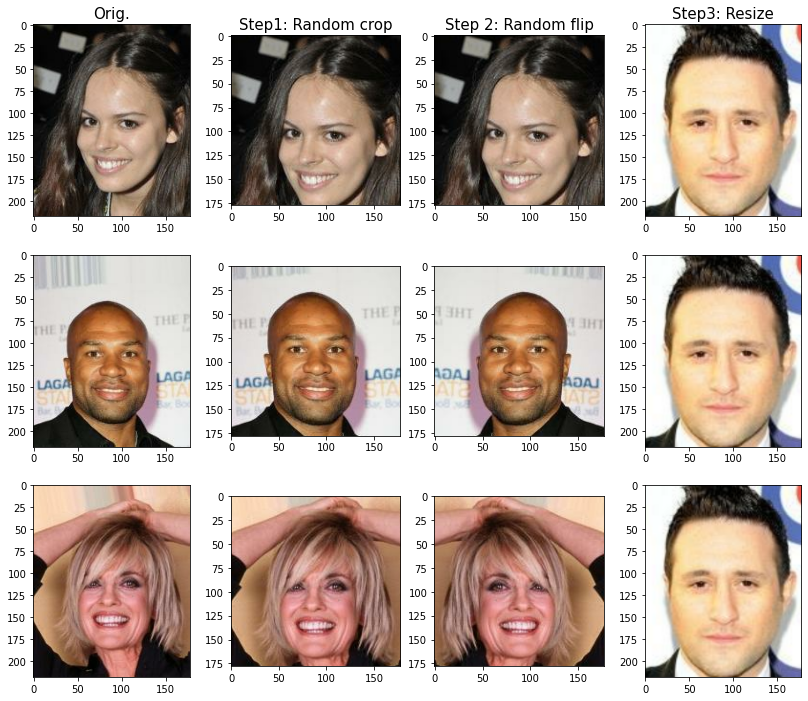

In [30]:
tf.random.set_seed(1)

fig = plt.figure(figsize=(14, 12))

for i, example in enumerate(celeba_train.take(3)):
    image = example['image']

    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(image)
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)
    img_crop = tf.image.random_crop(image, size=(178, 178, 3))
    ax.imshow(img_crop)
    if i == 0:
        ax.set_title('Step1: Random crop', size=15)
    
    ax = fig.add_subplot(3, 4, i*4+3)
    img_flip = tf.image.random_flip_left_right(img_crop)
    ax.imshow(tf.cast(img_flip, tf.uint8))
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)
    
    ax = fig.add_subplot(3, 4, i*4+4)
    img_resize = tf.image.resize(img_flip, size=(128, 128))
    ax.imshow(tf.cast(img_resized, tf.uint8))
    if i ==0:
        ax.set_title('Step3: Resize', size=15)

plt.show()


In [ ]:
def preprocess(example, size=(64, 64), mode='train'):
    image = example['image']
    label = example['attributes']['Male']
    if mode == 'train':
        image_cropped = tf.image.random_crop(
            image, size=(178, 178, 3)        )
        image_resized = tf.image.resize(
            image_cropped, size=size)
        image_flip = tf.image.random_flip_left_right(
            image_resized)
        return (image_flip/255.0, tf.cast(label, tf.int32))

    else:
        image_cropped = tf.image.crop_to_bounding_box(
            image, offset_height=20, offset_width=0,
            target_height=178, target_width=178)
        image_resized = tf.image.resize(
            image_cropped, size=size)
    return (image_resized/255.0, tf.cast(label, tf.int32))

item = next(iter(celeba_train))
preprocess(item, mode='train')

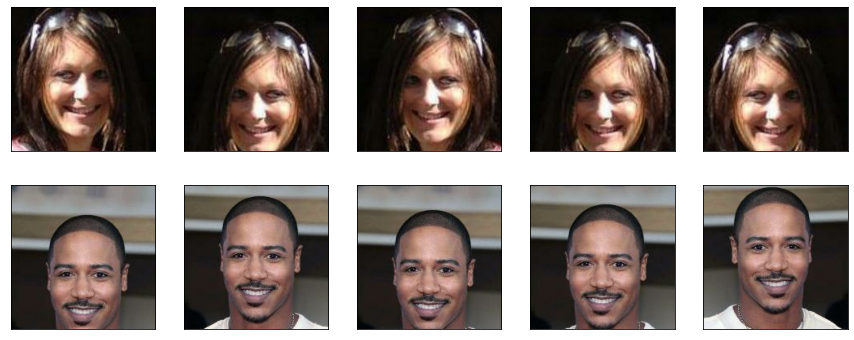

In [33]:
tf.random.set_seed(1)

ds = celeba_train.shuffle(1000, reshuffle_each_iteration=False)
ds = ds.take(2).repeat(5)

ds = ds.map(lambda x:preprocess(x, size=(178, 178), mode='train'))

fig = plt.figure(figsize=(15, 6))
for j, example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j//2+(j%2)*5+1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(example[0])
plt.show()

In [47]:
batch_size = 32
buffer_size = 1000
image_size = (64, 64)
steps_per_epoch = np.ceil(16000/batch_size)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda x: preprocess(x, size=image_size, mode='train'))
ds_train = ds_train.shuffle(buffer_size=buffer_size).repeat()
ds_train = ds_train.batch(batch_size)

ds_valid = celeba_valid.map(
    lambda x: preprocess(x, size=image_size, mode='eval'))
ds_valid = ds_valid.batch(batch_size)

500.0


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu')
])

In [41]:
model.compute_output_shape(input_shape=(None, 64, 64, 3))

TensorShape([None, 8, 8, 256])

In [42]:
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.compute_output_shape(input_shape=(None, 64, 64, 3))

TensorShape([None, 256])

In [43]:
model.add(tf.keras.layers.Dense(1, activation=None))

In [44]:
tf.random.set_seed(1)

model.build(input_shape=(None, 64, 64, 3))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)      

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 0.4908 - accuracy: 0.7454 - val_loss: 0.4293 - val_accuracy: 0.8220
Epoch 2/20
500/500 [==============================] - 14s 28ms/step - loss: 0.4495 - accuracy: 0.7767 - val_loss: 0.3719 - val_accuracy: 0.8210
Epoch 3/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3846 - accuracy: 0.8154 - val_loss: 0.2966 - val_accuracy: 0.8730
Epoch 4/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3259 - accuracy: 0.8481 - val_loss: 0.2714 - val_accuracy: 0.8400
Epoch 5/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2847 - accuracy: 0.8689 - val_loss: 0.1922 - val_accuracy: 0.9170
Epoch 6/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2722 - accuracy: 0.8772 - val_loss: 0.1835 - val_accuracy: 0.9200
Epoch 7/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2554 - accuracy: 0.8856 - val_loss: 0.2244 - val_accuracy:

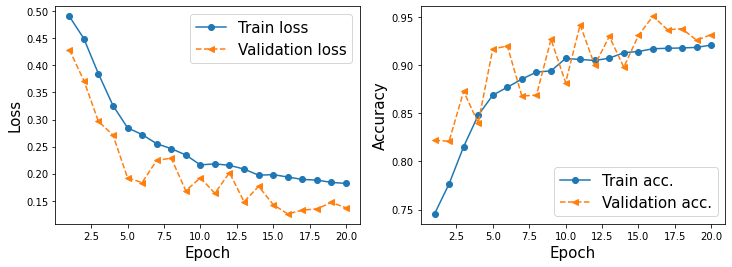

In [50]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel("Loss", size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [53]:
ds_test = celeba_test.map(
    lambda x:preprocess(x, size=image_size, mode='eval')).batch(32)
results = model.evaluate(ds_test, verbose=0)
print('Test Acc: {:.2f}'.format(results[1]*100))

Test Acc: 93.79


In [54]:
history = model.fit(ds_train, validation_data=ds_valid,
                    epochs=30, initial_epoch=20,
                    steps_per_epoch=steps_per_epoch)

Epoch 21/30
500/500 [==============================] - 13s 26ms/step - loss: 0.1779 - accuracy: 0.9243 - val_loss: 0.1636 - val_accuracy: 0.9100
Epoch 22/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1686 - accuracy: 0.9269 - val_loss: 0.1529 - val_accuracy: 0.9310
Epoch 23/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1710 - accuracy: 0.9266 - val_loss: 0.1335 - val_accuracy: 0.9300
Epoch 24/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1669 - accuracy: 0.9283 - val_loss: 0.1913 - val_accuracy: 0.9020
Epoch 25/30
500/500 [==============================] - 14s 27ms/step - loss: 0.1632 - accuracy: 0.9317 - val_loss: 0.1406 - val_accuracy: 0.9300
Epoch 26/30
500/500 [==============================] - 13s 27ms/step - loss: 0.1590 - accuracy: 0.9345 - val_loss: 0.1071 - val_accuracy: 0.9500
Epoch 27/30
500/500 [==============================] - 14s 28ms/step - loss: 0.1638 - accuracy: 0.9310 - val_loss: 0.1110 - val_ac

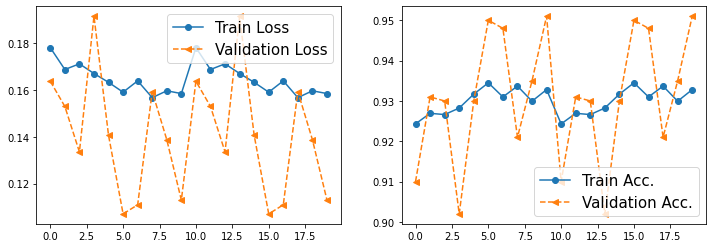

In [57]:
hist2 = history.history
x_arr = np.arange(len(hist['loss'] + hist2['loss']))


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss']+hist2['loss'], 
        '-o', label='Train Loss')
ax.plot(x_arr, hist['val_loss']+hist2['val_loss'],
        '--<', label='Validation Loss')
ax.legend(fontsize=15)


ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy']+hist2['accuracy'], 
        '-o', label='Train Acc.')
ax.plot(x_arr, hist['val_accuracy']+hist2['val_accuracy'], 
        '--<', label='Validation Acc.')
ax.legend(fontsize=15)
plt.show()



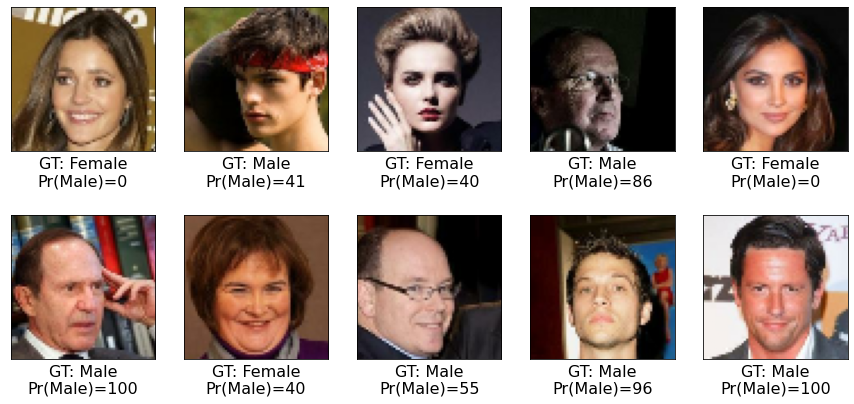

In [61]:
ds = ds_test.unbatch().take(10)

pred_logits = model.predict(ds.batch(10))
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100

fig = plt.figure(figsize=(15, 7))
for j, example in enumerate(ds):
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy() == 1:
        label = 'Male'
    else:
        label = 'Female'

    ax.text(
        0.5, -0.15,
        'GT: {:s}\nPr(Male)={:.0f}'.format(label, probas[j]),
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
plt.show()